# Analysis of the nationalities

In this notebook, we will analyze the nationalities on Wikidata. On Wikidata, the property 'nationality' not really exists and corresponds to "country of citizenship" (P27). We will not study each country because they evolve and their name and shape change. For this reason, the number of countries is too large to study (and some nationalities could be duplicated). The solution is to aggregate countries into continents or regions. For this reason, we will study the continent at first, then, the European regions. In this analysis, we will compare the nationality property with others like gender, type (i.e "economist", "jurist" and "jurist/economists"), and occupation. We will also study the evolution by period.

In [1]:
# Install libraries

from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML

from collections import Counter
from operator import itemgetter

import sqlite3 as sql
import time

from importlib import reload
from shutil import copyfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pprint
import csv
import ast
import re

In [2]:
### install ipywidgets  cf . https://ipywidgets.readthedocs.io/en/latest/user_install.html
from ipywidgets import (
    interact, IntSlider, Checkbox,
    interactive, SelectMultiple, Button)
"""    fixed,
    interactive, Button,
    HTML, Layout,GridspecLayout,
    Output, jslink,
     ColorPicker,
    Text, SelectionRangeSlider,
    FloatRangeSlider, SelectMultiple, Checkbox,
    VBox, HBox
"""

'    fixed,\n    interactive, Button,\n    HTML, Layout,GridspecLayout,\n    Output, jslink,\n     ColorPicker,\n    Text, SelectionRangeSlider,\n    FloatRangeSlider, SelectMultiple, Checkbox,\n    VBox, HBox\n'

In [3]:
import sparql_functions as spqf

In [4]:
### It's define the database ligne to use
pk_query = 21

# Connexion to the database
original_db = 'data/sparql_queries.db'
conn = sql.connect(original_db)

c = conn.cursor()

### It runs the query on the SQLite database to get the row values 
c.execute('SELECT * FROM query WHERE pk_query = ?', [pk_query]) ### a list around argument is needed for a string longer then one
#c.execute('SELECT * FROM query WHERE pk_query = 10')

rc = c.fetchone()

# close connexion
conn.close()


In [5]:
print("\033[1mDescription:\033[0m\n\n"+rc[3]  + "\n-----\n" +"\033[1mDatabase:\033[0m\n\n"+ rc[2]+  "\n----\n"+"\033[1mNotes:\033[0m\n\n" +rc[7] + "\n----\n"+"\033[1mTime stamp:\033[0m\n\n"+rc[8]+  "\n--------------\n" +"\033[1mSparl endpoint:\033[0m\n\n"+   rc[5] + "\n-----------\n" +"\033[1mQuery:\033[0m\n\n"+ rc[6])

Description:

The query gets the individuals with their occupations and theirs type ("economist", "jurist", "economist|jurist") to compare them. 
-----
Database:

Wikidata
----
Notes:

\
----
Time stamp:

2021-06-22 14:30:36
--------------
Sparl endpoint:

http://localhost:7200/repositories/IMPORT
-----------
Query:

PREFIX  xsd:  <http://www.w3.org/2001/XMLSchema#>
PREFIX  rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX  wd:   <http://www.wikidata.org/entity/>
PREFIX  wdt:  <http://www.wikidata.org/prop/direct/>

SELECT  ?person ?occupation ?birthDate ?type
WHERE
  { SELECT DISTINCT  ?person ?occupation (round(AVG(?birthDate_AVG)) AS ?birthDate) ?type
    WHERE
      { { SELECT DISTINCT  ?person ?occupation (year(xsd:dateTime(?bD)) AS ?birthDate_AVG) (GROUP_CONCAT(DISTINCT ?type1 ; separator='|') AS ?type_concat)
          WHERE
            { ?person  wdt:P569    ?bD ;
                           wdt:P21     ?gender;
                           wdt:P27     ?nationality;
           

In [6]:
### Execute the SPARQL query wrapped in the function in the library _sparql_functions.py_
# The first setting correspond to SPARQL Endpoint, the seconde to the query
q = spqf.get_json_sparql_result(rc[5],rc[6])

<class 'dict'>


In [7]:
##### Transform the result into a list with a fonction of the library #####
#### Result of the query
r_query = [l for l in spqf.sparql_result_to_list(q)]
print(len(r_query))
#r_query

103446


In [8]:
df_result = pd.DataFrame(r_query)
df_result.columns =['id_entity', 'occupation', 'year', 'type']
df_result[:15]
print(len(df_result))

103446


In [8]:
# Save the list in the CSV format 
# It is necessary after saving to code all nationalities into continent 
file= 'spreadsheets/nationalities.csv'
with open(file, 'w', newline='') as csvfile:
    writ = csv.writer(csvfile, delimiter='|',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writ.writerow(['nationality', 'freq', 'code'])
    for l in r_query:
        writ.writerow(l)

In [9]:
# It opens the file with the continent (the continents has been added handmade)
file= 'spreadsheets/nationalities_coded.csv'
file_cont = []
with open(file, newline='') as csvfile:
    read = csv.reader(csvfile, delimiter='|', quotechar='"')
    for row in read:
        file_cont.append(row)

In [10]:
print(len(file_cont))
file_cont[1:10]

502


[['United States of America', '25500', 'Unite', 'North Am.'],
 ['Germany', '12223', 'Germa', 'Europe'],
 ['Spain', '5396', 'Spain', 'Europe'],
 ['France', '3933', 'Franc', 'Europe'],
 ['United Kingdom', '3853', 'Unite', 'Europe'],
 ['Japan', '3845', 'Japan', 'Asia'],
 ['Poland', '3016', 'Polan', 'Europe'],
 ['Brazil', '2721', 'Brazi', 'South Am.'],
 ['Canada', '2598', 'Canad', 'North Am.']]

In [11]:
# Keep only the nationality and its continent
df_coded_nation = pd.DataFrame(file_cont[1:], columns=['nationality','freq','code', 'continent'])
nat_coded = df_coded_nation[['nationality','continent']]
print(len(nat_coded))
nat_coded.head()

501


,nationality,continent
0,United States of America,North Am.
1,Germany,Europe
2,Spain,Europe
3,France,Europe
4,United Kingdom,Europe


In [14]:
## It's define the database ligne to use
pk_query = 17

# Connexion to the database
original_db = 'data/sparql_queries.db'
conn = sql.connect(original_db)

c = conn.cursor()

### It runs the query on the SQLite database to get the row values 
c.execute('SELECT * FROM query WHERE pk_query = ?', [pk_query]) ### a list around argument is needed for a string longer then one
#c.execute('SELECT * FROM query WHERE pk_query = 10')

rc = c.fetchone()

# close connexion
conn.close()


In [15]:
print("\033[1mDescription:\033[0m\n\n"+rc[3]  + "\n-----\n" +"\033[1mDatabase:\033[0m\n\n"+ rc[2]+  "\n----\n"+"\033[1mNotes:\033[0m\n\n" +rc[7] + "\n----\n"+"\033[1mTime stamp:\033[0m\n\n"+rc[8]+  "\n--------------\n" +"\033[1mSparl endpoint:\033[0m\n\n"+   rc[5] + "\n-----------\n" +"\033[1mQuery:\033[0m\n\n"+ rc[6])

Description:

We seek to obtain the year of the individuals to analyze the nationalities in the time.
-----
Database:

Wikidata
----
Notes:


----
Time stamp:

2021-06-16 17:58:19
--------------
Sparl endpoint:

http://localhost:7200/repositories/IMPORT
-----------
Query:

PREFIX ome: <https://ontome.net/class/>
PREFIX  bio: <http://vocab.org/bio/0.1/>
PREFIX  egr:  <http://rdvocab.info/ElementsGr2/>

PREFIX  wd:   <http://www.wikidata.org/entity/>
PREFIX  wdt:  <http://www.wikidata.org/prop/direct/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
SELECT  ?person   ?year ?nationality
WHERE{
SELECT  ?person ?nationality (ROUND(AVG(?birthDate_avg)) AS ?year)
WHERE {
    SELECT Distinct ?person ?nationality (YEAR(?bD) AS ?birthDate_avg)
   WHERE
      {?person wdt:P569 ?bD .
       ?person wdt:P27 ?na .
       ?na rdfs:label ?national

In [16]:
### Execute the SPARQL query wrapped in the function in the library _sparql_functions.py_
# The first setting correspond to SPARQL Endpoint, the seconde to the query
q = spqf.get_json_sparql_result(rc[5],rc[6])

<class 'dict'>


In [17]:
##### Transform the result into a list with a fonction of the library #####
#### Result of the query
r_query = [l for l in spqf.sparql_result_to_list(q)]
print(len(r_query))
#r_query

118874


In [18]:
# Create a dataFrame
df_result_year = pd.DataFrame(r_query)
df_result_year.columns =['uri_entity', 'year', 'nationality']


In [19]:
df_result_year.head()

,uri_entity,year,nationality
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,Canada
1,urn:uuid:5c7f3133-a15b-4f35-8e17-162cf63207f7,1809,United States of America
2,urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,1912,Germany
3,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,1884,United States of America
4,urn:uuid:2178758f-d8df-447d-b64b-bd78dfe045b7,1940,Ukraine


In [20]:
# Add the continent of the individuals
merged = pd.merge(df_result_year,nat_coded, on='nationality', sort=False)
print(len(merged))
merged.sort_values(by=['uri_entity']).loc[30:50,]

118874


,uri_entity,year,nationality,continent
30,urn:uuid:63cef059-c16a-475c-b4a3-f2b013d705ee,1840,Canada,North Am.
75944,urn:uuid:63cf0cd9-b90b-423d-8d51-b0792bcba109,1954,Mexico,North Am.
11123,urn:uuid:63cf62b9-6d0a-4a63-ba09-da3055ea98a0,1872,United States of America,North Am.
80049,urn:uuid:63d00487-57f8-4fcd-a65d-a59145e0d193,1943,Italy,Europe
82561,urn:uuid:63d00487-57f8-4fcd-a65d-a59145e0d193,1943,Kingdom of Italy,Europe
73288,urn:uuid:63d078bb-78af-4b65-ad69-79722434cc39,1906,Kingdom of the Netherlands,Europe
33523,urn:uuid:63d10ba3-117a-4ac3-8760-9c34ca25f1d8,1904,Germany,Europe
93063,urn:uuid:63d14ba3-665f-4803-8623-b94a13d932b9,1952,Slovenia,Europe
106809,urn:uuid:63d14ba3-665f-4803-8623-b94a13d932b9,1952,Socialist Federal Republic of Yugoslavia,Europe
109419,urn:uuid:63d17b00-db9b-4763-ba68-dd19bc7e1253,1930,Luxembourg,Europe


In [21]:
merged.to_csv('spreadsheets/nationalities_encoded.csv', sep="|",index=False)

merged= pd.read_csv("spreadsheets/nationalities_encoded.csv", sep="|")

In [22]:
### drop duplicates
## Each person has one year and one continent 
# (unless if his nationalities are on more than one continent)
coded_nationalities = merged[['uri_entity','year','continent']].drop_duplicates()
print(len(coded_nationalities))
coded_nationalities.sort_values(by=['uri_entity']).loc[30:50,]

109456


,uri_entity,year,continent
30,urn:uuid:63cef059-c16a-475c-b4a3-f2b013d705ee,1840,North Am.
75944,urn:uuid:63cf0cd9-b90b-423d-8d51-b0792bcba109,1954,North Am.
11123,urn:uuid:63cf62b9-6d0a-4a63-ba09-da3055ea98a0,1872,North Am.
80049,urn:uuid:63d00487-57f8-4fcd-a65d-a59145e0d193,1943,Europe
73288,urn:uuid:63d078bb-78af-4b65-ad69-79722434cc39,1906,Europe
33523,urn:uuid:63d10ba3-117a-4ac3-8760-9c34ca25f1d8,1904,Europe
93063,urn:uuid:63d14ba3-665f-4803-8623-b94a13d932b9,1952,Europe
109419,urn:uuid:63d17b00-db9b-4763-ba68-dd19bc7e1253,1930,Europe
117691,urn:uuid:63d2a22d-95e1-4f9f-aaee-65480955badf,1790,Europe
94717,urn:uuid:63d2fd39-976d-4760-9cc3-38033fe3c5d9,1857,Europe


In [23]:
# Transform into a list
coded_nat_list = coded_nationalities[['year', 'continent']].values.tolist()
coded_nat_list[:10]

[['1959', 'North Am.'],
 ['1927', 'North Am.'],
 ['1955', 'North Am.'],
 ['1927', 'North Am.'],
 ['1827', 'North Am.'],
 ['1860', 'North Am.'],
 ['1873', 'North Am.'],
 ['1882', 'North Am.'],
 ['1900', 'North Am.'],
 ['1933', 'North Am.']]

In [24]:
### Group the list per continent
counter= Counter([t[1] for t in coded_nat_list])
c_coded_nat_list = list(zip(counter.keys(), counter.values()))
sorted_coded_nat_list = sorted(c_coded_nat_list, key=itemgetter(1), reverse=True)
sorted_coded_nat_list

[('Europe', 57007),
 ('North Am.', 29140),
 ('South Am.', 8467),
 ('Asia', 7738),
 ('Middle East', 2787),
 ('Africa', 1994),
 ('Oceania', 1531),
 ('Central Am.', 786),
 ('uncoded', 6)]

In [25]:
### Group in series per continent
gb_coded_nationalities = coded_nationalities.groupby('continent').size()
gb_coded_nationalities.sort_values(ascending = False)

continent
Europe         57007
North Am.      29140
South Am.       8467
Asia            7738
Middle East     2787
Africa          1994
Oceania         1531
Central Am.      786
uncoded            6
dtype: int64

In [26]:
### Transform the object 'Series' into a DataFrame and add the label of the 'frequency' column
# continent is defined as an index
df_coded_nat = gb_coded_nationalities.to_frame()
df_coded_nat.columns = ['frequency']
df_coded_nat

,frequency
continent,
Africa,1994
Asia,7738
Central Am.,786
Europe,57007
Middle East,2787
North Am.,29140
Oceania,1531
South Am.,8467
uncoded,6


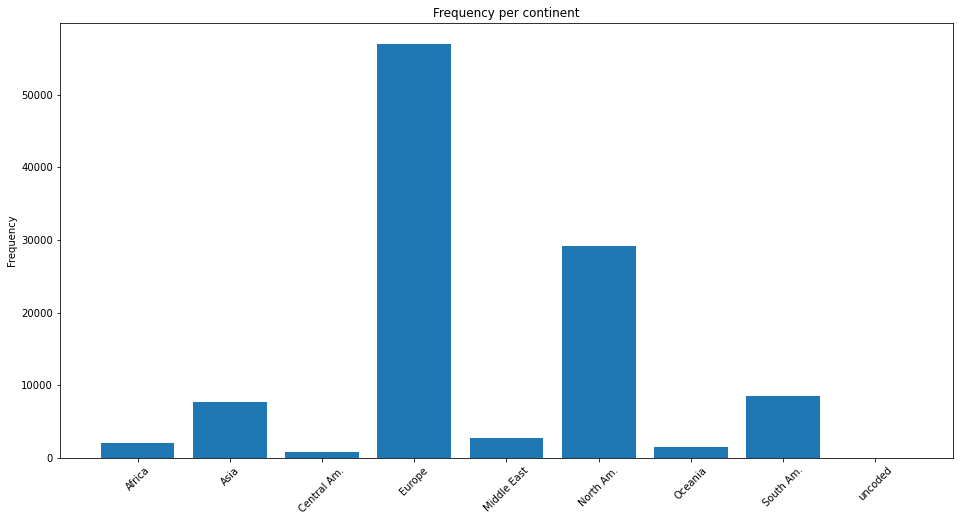

In [27]:
# Distribution per year

objects = [l for l in df_coded_nat.index]
eff = [l for l in df_coded_nat['frequency']]

p1 = plt.bar(objects, eff)

#plt.xticks(l5Years)
plt.ylabel('Frequency')
plt.title('Frequency per continent')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
#plt.savefig('exported_pictures/nationalities/Frequency_continent.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()



## Distribution of nationalities over time

Now, we examine the distribution of the nationalities (with the continent) over time (1771 until now).

In [28]:
values_l = [x[0] for x in sorted_coded_nat_list]
values_l

['Europe',
 'North Am.',
 'South Am.',
 'Asia',
 'Middle East',
 'Africa',
 'Oceania',
 'Central Am.',
 'uncoded']

In [29]:
### Transform year into integers
int_coded_nat_list = [[int(l[0]), l[1]] for l in coded_nat_list]
int_coded_nat_list[:5]

[[1959, 'North Am.'],
 [1927, 'North Am.'],
 [1955, 'North Am.'],
 [1927, 'North Am.'],
 [1827, 'North Am.']]

In [30]:
### Create a list with intervals of 20 years.

def create_years_list(period = 10, y_start = 1791, y_end = 1801):

    y_list = []
    y_list.append(y_start)

    while y_start < y_end:
        y_start += period
        y_list.append(y_start)
    return y_list

In [31]:
def interactive_nationality_periods(nationality, period = 10, remaining = False):
    
    output_l = []
    work_l = int_coded_nat_list # The year must be integers
    for a in nationality:
        prov_l = []
        for l in work_l:            
            if a == l[1]:
                output_l.append(l)
            else:
                prov_l.append(l)
        work_l = prov_l

    print('Number of nationalities chosen: ', len(output_l))
    print('The other (nationalitiesunchosen): ',len(work_l))
    # print('\n-----')
    
    period = period # 20 10
    y_list = create_years_list(period = period, y_start = 1771, y_end = 1920)
    
    
    
    with plt.style.context("ggplot"):
                
        fig, ax = plt.subplots(figsize=(16,8)) 


        width =  period - (period * 10 / 100)

        bottom_list = []
        i = 0
        while i < len(y_list):
            bottom_list.append(0)
            i += 1

        if remaining:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in work_l:
                    if int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            # print('BBB: ', i_list)            
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label='remaining' )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]


        for a in nationality:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in output_l:
                    if l[1] == a and int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            # print('AAA: ', i_list)            
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label=a )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]
            # print(bottom_list)

        ax.set_ylabel('Frequency')
        ax.set_title('Frequency per nationality')
        
        plt.xticks(y_list,rotation=45)

        ax.legend()

        p_out = plt.show()


In [32]:
# Frequency per nationality with intervals of 10 years.

k = interactive(interactive_nationality_periods, nationality=SelectMultiple(
    options=sorted(values_l),
    value=['Europe'], # You can chose the continent, you want to visualize (one or more)
    description='Number of nationalities chosen: ',
    disabled=False
),  period=IntSlider(min=5, max=50, step=5, value=5),
    remaining = Checkbox(
    value=False,
    description='The other (nationalities unchosen):',
    disabled=False
))

Number of nationalities chosen:  57007
The other (nationalitiesunchosen):  52449


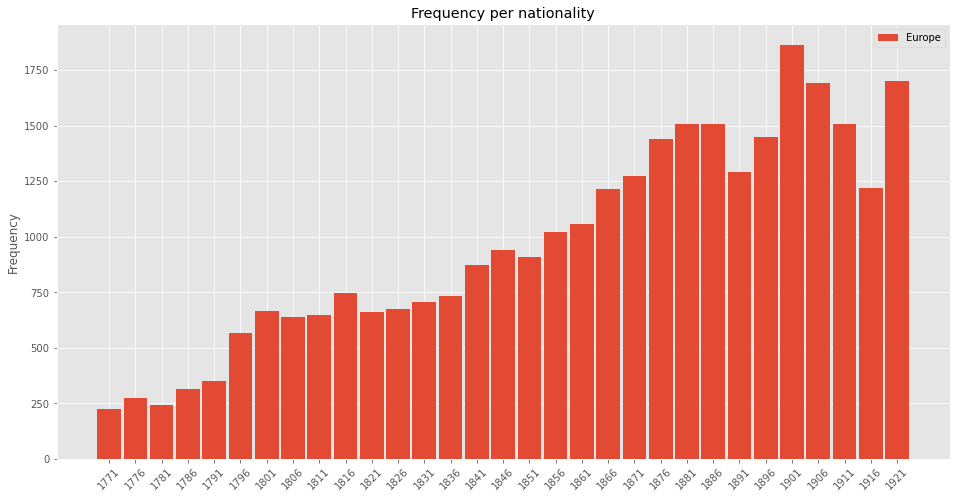

In [33]:
display(k)

In [34]:
# Frequency per nationality with intervals of 20 years.

k = interactive(interactive_nationality_periods, nationality=SelectMultiple(
    options=sorted(values_l),
    value=['Asia','Europe', 'North Am.'],
    #rows=10,
    description='Number of nationalities chosen: ',
    disabled=False
),  period=IntSlider(min=5, max=50, step=5, value=20),
    remaining = Checkbox(
    value=False,
    description='The other (nationalities unchosen):',
    disabled=False
))



Number of nationalities chosen:  93885
The other (nationalitiesunchosen):  15571


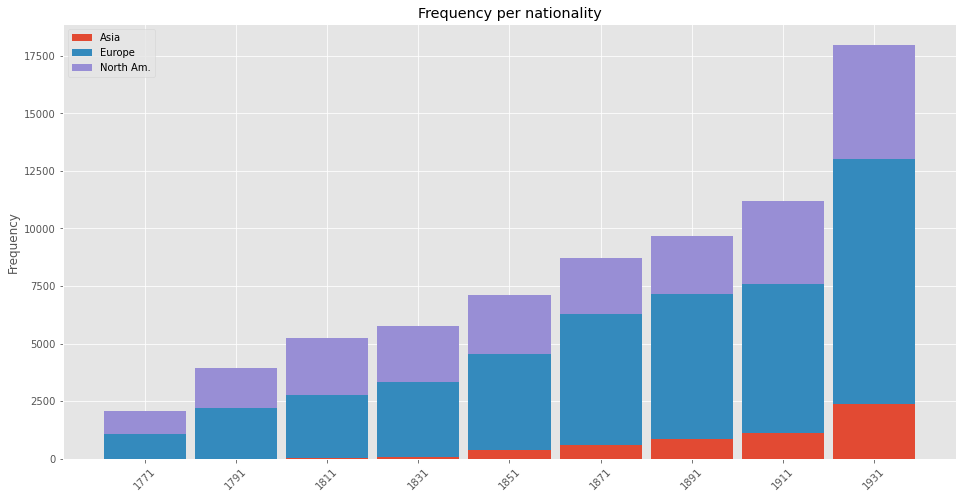

In [35]:
display(k)

## Analysis of the nationalities per occupation

Below, we analyse the nationalities comparing the number of "jurists" and "economist". We will use again use the continent to aggregate the nationalities and better visualize them. 

In [36]:
## It's define the database ligne to use
pk_query = 20

# Connexion to the database
original_db = 'data/sparql_queries.db'
conn = sql.connect(original_db)

c = conn.cursor()

c.execute('SELECT * FROM query WHERE pk_query = ?', [pk_query]) ### a list around argument is needed for a string longer then one

rc = c.fetchone()

# close connexion
conn.close()


In [37]:
print("\033[1mDescription:\033[0m\n\n"+rc[3]  + "\n-----\n" +"\033[1mDatabase:\033[0m\n\n"+ rc[2]+  "\n----\n"+"\033[1mNotes:\033[0m\n\n" +rc[7] + "\n----\n"+"\033[1mTime stamp:\033[0m\n\n"+rc[8]+  "\n\n\n--------------\n" +"\033[1mSparl endpoint:\033[0m\n\n"+   rc[5] + "\n\n\n-----------\n" +"\033[1mQuery:\033[0m\n\n"+ rc[6])

Description:

We seek to obtain the gender of the individuals to compare the difference between male and female per continent.
-----
Database:

Wikidata
----
Notes:

The GROUP BY clause is used on the professions to distinguish between people who are only economists or lawyers and people exercising both professions. Unfortunately, in some cases, the concatenations give a different result than only "economist | jurist" (e.g "economist | jurist | jurist") which we correct more easily in the notebook.
----
Time stamp:

2021-06-20 17:28:19


--------------
Sparl endpoint:

http://localhost:7200/repositories/IMPORT


-----------
Query:

PREFIX ome: <https://ontome.net/class/>
PREFIX  bio: <http://vocab.org/bio/0.1/>
PREFIX  egr:  <http://rdvocab.info/ElementsGr2/>

PREFIX  wd:   <http://www.wikidata.org/entity/>
PREFIX  wdt:  <http://www.wikidata.org/prop/direct/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX rdf: <http://www.w3.org

In [39]:
### Execute the SPARQL query wrapped in the function in the library _sparql_functions.py_
# The first setting correspond to SPARQL Endpoint, the seconde to the query
q = spqf.get_json_sparql_result(rc[5],rc[6])

<class 'dict'>


In [40]:
##### Transform the result into a list with a fonction of the library #####
#### Result of the query
r_query = [l for l in spqf.sparql_result_to_list(q)]
print(len(r_query))
#r_query

118175


In [41]:
df_occ_gend = pd.DataFrame(r_query)
df_occ_gend.columns =['uri_entity', 'year', 'nationality', 'occupation', 'gender'] # We already add the column "gender" for after.
df_occ_gend[:50]

,uri_entity,year,nationality,occupation,gender
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,Canada,economist,male
1,urn:uuid:5c7f3133-a15b-4f35-8e17-162cf63207f7,1809,United States of America,jurist,male
2,urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,1912,Germany,jurist|jurist,female
3,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,1884,United States of America,jurist,male
4,urn:uuid:2178758f-d8df-447d-b64b-bd78dfe045b7,1940,Ukraine,economist,male
5,urn:uuid:490ab506-b377-4e39-bf39-3d6e3f732a62,1907,United States of America,jurist,male
6,urn:uuid:8b81cd5a-63af-4905-817e-9dcea33ae252,1939,Germany,jurist,male
7,urn:uuid:0a98b4ed-2ecf-4a4f-8250-e405279d4f64,1965,Germany,jurist,male
8,urn:uuid:13dbca6a-92fc-4582-8d38-796577b4c0d0,1864,Hungary,jurist|jurist,male
9,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,Canada,jurist|jurist,male


In [42]:
df_occ_gend.to_csv('spreadsheets/df_nationalities_occ_gender.csv', sep="|",index=False)

In [43]:
df_occ_gend= pd.read_csv("spreadsheets/df_nationalities_occ_gender.csv", sep="|")
df_occ_gend

,uri_entity,year,nationality,occupation,gender
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,Canada,economist,male
1,urn:uuid:5c7f3133-a15b-4f35-8e17-162cf63207f7,1809,United States of America,jurist,male
2,urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,1912,Germany,jurist|jurist,female
3,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,1884,United States of America,jurist,male
4,urn:uuid:2178758f-d8df-447d-b64b-bd78dfe045b7,1940,Ukraine,economist,male
5,urn:uuid:490ab506-b377-4e39-bf39-3d6e3f732a62,1907,United States of America,jurist,male
6,urn:uuid:8b81cd5a-63af-4905-817e-9dcea33ae252,1939,Germany,jurist,male
7,urn:uuid:0a98b4ed-2ecf-4a4f-8250-e405279d4f64,1965,Germany,jurist,male
8,urn:uuid:13dbca6a-92fc-4582-8d38-796577b4c0d0,1864,Hungary,jurist|jurist,male
9,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,Canada,jurist|jurist,male


In [44]:
### change the values of occupations to have only three subpopulations, "economist", "jurist" and "jurist/economist".
### change the values of genders to haves only three values "female", "male" and "other"

# Jurist
df_occ_gend['occupation'].replace(["jurist|jurist", "jurist|jurist|jurist", "jurist|jurist|jurist|jurist", "legal jurist in France", "jurist|legal jurist in France"],'jurist',inplace=True)
# Jurist/economist
df_occ_gend['occupation'].replace(["jurist|jurist|economist", "jurist|jurist|jurist|economist", "jurist|jurist|jurist|jurist", "jurist|economist|jurist", "economist|jurist", "jurist|economist"],'jurist/economist',inplace=True)
# Gender
df_occ_gend['gender'].replace(['transgender male', 'transgender female', 'transfeminine', 'non-binary','intersex'],'other',inplace=True)
df_occ_gend[:10]
print(len(df_occ_gend))

118175


In [45]:
### drop duplicates
## Each person has one year and one continent 
# (unless if his nationalities are on more than one continent)
df_result_drop = df_occ_gend[['uri_entity','year','nationality', 'occupation', 'gender']].drop_duplicates()
print(len(df_result_drop))
df_result_drop[:50]

118175


,uri_entity,year,nationality,occupation,gender
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,Canada,economist,male
1,urn:uuid:5c7f3133-a15b-4f35-8e17-162cf63207f7,1809,United States of America,jurist,male
2,urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,1912,Germany,jurist,female
3,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,1884,United States of America,jurist,male
4,urn:uuid:2178758f-d8df-447d-b64b-bd78dfe045b7,1940,Ukraine,economist,male
5,urn:uuid:490ab506-b377-4e39-bf39-3d6e3f732a62,1907,United States of America,jurist,male
6,urn:uuid:8b81cd5a-63af-4905-817e-9dcea33ae252,1939,Germany,jurist,male
7,urn:uuid:0a98b4ed-2ecf-4a4f-8250-e405279d4f64,1965,Germany,jurist,male
8,urn:uuid:13dbca6a-92fc-4582-8d38-796577b4c0d0,1864,Hungary,jurist,male
9,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,Canada,jurist,male


In [46]:
# Add the continent of the individuals
merged = pd.merge(df_result_drop,nat_coded, on='nationality', sort=False)
print(len(merged))
merged.sort_values(by=['uri_entity']).loc[30:50]

118175


,uri_entity,year,nationality,occupation,gender,continent
30,urn:uuid:63cef059-c16a-475c-b4a3-f2b013d705ee,1840,Canada,jurist,male,North Am.
75511,urn:uuid:63cf0cd9-b90b-423d-8d51-b0792bcba109,1954,Mexico,economist,male,North Am.
11119,urn:uuid:63cf62b9-6d0a-4a63-ba09-da3055ea98a0,1872,United States of America,jurist,male,North Am.
82122,urn:uuid:63d00487-57f8-4fcd-a65d-a59145e0d193,1943,Kingdom of Italy,economist,male,Europe
79612,urn:uuid:63d00487-57f8-4fcd-a65d-a59145e0d193,1943,Italy,economist,male,Europe
72856,urn:uuid:63d078bb-78af-4b65-ad69-79722434cc39,1906,Kingdom of the Netherlands,jurist,male,Europe
33517,urn:uuid:63d10ba3-117a-4ac3-8760-9c34ca25f1d8,1904,Germany,jurist,male,Europe
92492,urn:uuid:63d14ba3-665f-4803-8623-b94a13d932b9,1952,Slovenia,economist,male,Europe
106119,urn:uuid:63d14ba3-665f-4803-8623-b94a13d932b9,1952,Socialist Federal Republic of Yugoslavia,economist,male,Europe
108728,urn:uuid:63d17b00-db9b-4763-ba68-dd19bc7e1253,1930,Luxembourg,jurist,male,Europe


In [47]:
coded_nationalities = merged[['uri_entity','year','continent', 'occupation', 'gender']].drop_duplicates()
print(len(merged))
coded_nationalities[:10]

118175


,uri_entity,year,continent,occupation,gender
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,North Am.,economist,male
1,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,North Am.,jurist,male
2,urn:uuid:98651569-7301-4398-a760-bcb03931dc0f,1955,North Am.,jurist,male
3,urn:uuid:080c5cc7-c62c-46ec-b0e9-0b98b6adc235,1927,North Am.,economist,male
4,urn:uuid:f967d755-8e28-4729-9966-1aa3e0bdba98,1827,North Am.,jurist,male
5,urn:uuid:50628dbc-50cd-4fd7-93f6-a444c2dac636,1860,North Am.,jurist,male
6,urn:uuid:d5e86bba-4821-421e-9706-438a58c978a3,1873,North Am.,jurist,male
7,urn:uuid:84d140c5-57f6-4a86-a8d2-280219e33b79,1882,North Am.,jurist,male
8,urn:uuid:c9fbd132-1389-44cd-a122-50c8a27dfe45,1900,North Am.,jurist,male
9,urn:uuid:9e654a4d-24d5-4c27-8e3c-d6915e0a7fb6,1933,North Am.,jurist,male


In [48]:
coded_nationalities.to_csv("spreadsheets/continent_occ_gender.csv", sep="|", index="id_entity")
coded_nationalities

,uri_entity,year,continent,occupation,gender
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,North Am.,economist,male
1,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,North Am.,jurist,male
2,urn:uuid:98651569-7301-4398-a760-bcb03931dc0f,1955,North Am.,jurist,male
3,urn:uuid:080c5cc7-c62c-46ec-b0e9-0b98b6adc235,1927,North Am.,economist,male
4,urn:uuid:f967d755-8e28-4729-9966-1aa3e0bdba98,1827,North Am.,jurist,male
5,urn:uuid:50628dbc-50cd-4fd7-93f6-a444c2dac636,1860,North Am.,jurist,male
6,urn:uuid:d5e86bba-4821-421e-9706-438a58c978a3,1873,North Am.,jurist,male
7,urn:uuid:84d140c5-57f6-4a86-a8d2-280219e33b79,1882,North Am.,jurist,male
8,urn:uuid:c9fbd132-1389-44cd-a122-50c8a27dfe45,1900,North Am.,jurist,male
9,urn:uuid:9e654a4d-24d5-4c27-8e3c-d6915e0a7fb6,1933,North Am.,jurist,male


### Contingency table between occupation and continent

With the contingency table, we can produce a better visualization between the both variables. This visualization is a stacked plot with the proportion of continent per occupation, at the same time, visualized in percentage and with the number of individuals.

In [49]:
### Occupation-continent contingency table with totals

X = "occupation"
Y = "continent"

contingContOcc = coded_nationalities[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len, margins=True, margins_name='All*').fillna(0).astype(int) 
# Sort the values by the total to see better with the visualization
contingContOcc = contingContOcc.sort_values(by="All*")
# Drop the column "All",  otherwise it appears as the modality in the plot
contingContOcc= contingContOcc.loc[:,contingContOcc.columns!="All*"]

contingContOcc

occupation,economist,jurist,jurist/economist
continent,,,
uncoded,0,6,0
Central Am.,113,662,11
Oceania,210,1318,5
Africa,483,1497,10
Middle East,696,2065,23
Asia,2646,4483,19
South Am.,1290,7049,116
North Am.,2540,26523,70
Europe,13414,43028,483


In [50]:
# change the number of individuals into a percentage
perc_contin_OC= contingContOcc.apply(lambda x: x*100/sum(x), axis=1)

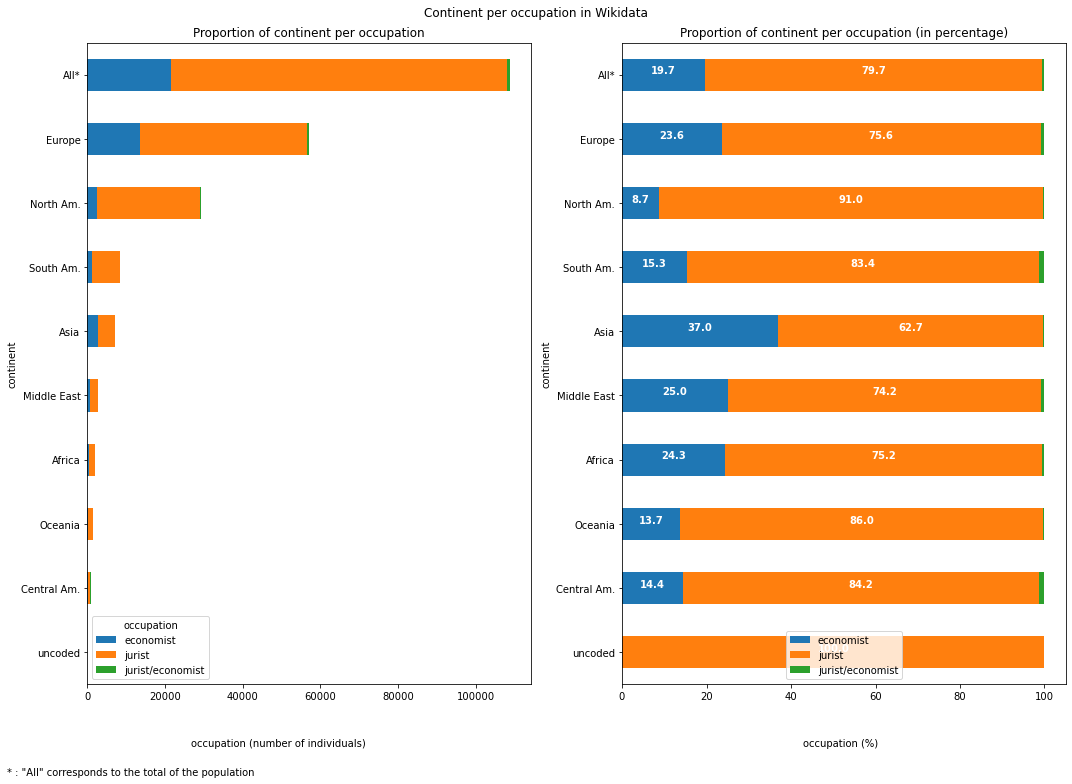

In [139]:
### create subplots side by side: 
# It is the best way, I found, but there are many other: cf. https://stackoverflow.com/questions/56121883/subplots-frequency-plots

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Continent per occupation in Wikidata')
contingContOcc.plot( kind='barh', stacked=True, ax=ax1, title="Proportion of continent per occupation")
z_CO=perc_contin_OC.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of continent per occupation (in percentage)")
plt.tight_layout()

# Set labels and legends: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

fig.text(0.747, -0.05, 'occupation (%)', ha='left', va='bottom')
fig.text(0.180, -0.05, 'occupation (number of individuals)', ha='left', va='bottom')
fig.text(0.01, -0.09, '* : "All" corresponds to the total of the population', ha='left', va='bottom')

#  Add percentages on the right plot: cf. https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
### drop the values inferior to: https://stackoverflow.com/questions/54682665/hide-matplot-annotation-if-value-is-0 

for p in z_CO.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 2:
        z_CO.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.legend(loc='lower center')
plt.savefig('exported_pictures/nationalities/Bigraphe_continent_per_occupation.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.show()

## Analysis of the continent per gender

After to have analyse the continent per occupation, we will realise the same method to analyse the genders. 

### Contingency table between gender and continent

With the contingency table, we can produce a better visualization between the both variables. This visualization is a stacked plot with the proportion of continent per gender (in percentage).

In [52]:
### Gender-continent contingency table with totals

X = "gender"  
Y = "continent"

contingContGend = coded_nationalities[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len, margins=True, margins_name='All*').fillna(0).astype(int) 
contingContGend = contingContGend.sort_values(by="All*")
contingContGend= contingContGend.loc[:,contingContGend.columns!="All*"]

In [53]:
### Gender-continent contingency table with totals in percentage 

perc_contin_CG = contingContGend.apply(lambda x: x*100/sum(x), axis=1)

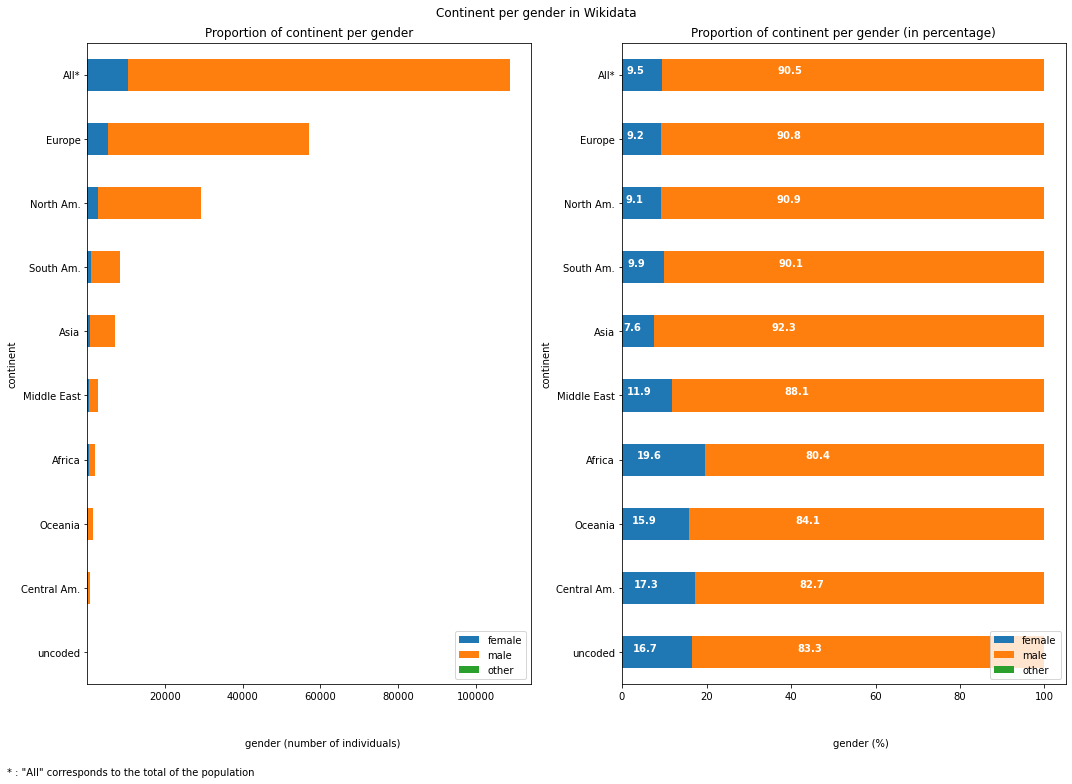

In [54]:
### create subplots side by side: 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Continent per gender in Wikidata')
contingContGend.plot( kind='barh', stacked=True, ax=ax1, title="Proportion of continent per gender")
z_CG=perc_contin_CG.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of continent per gender (in percentage)")
plt.tight_layout()

# Set labels and legends

fig.text(0.775, -0.05, 'gender (%)', ha='left', va='bottom')
fig.text(0.230, -0.05, 'gender (number of individuals)', ha='left', va='bottom')
fig.text(0.01, -0.09, '* : "All" corresponds to the total of the population', ha='left', va='bottom')

# Set percentage on the plot: 
for p in z_CG.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 2:
        z_CG.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/3, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12),
                   textcoords = 'offset points')
        
ax1.legend(loc='lower right')
ax2.legend(loc='lower right')

plt.show()

## Continents per generation

## Contingency table between continent and generation

In [56]:
#Check the data type of year
print(coded_nationalities.dtypes)
min(coded_nationalities['year']), max(coded_nationalities['year'])

uri_entity    object
year           int64
continent     object
occupation    object
gender        object
dtype: object


(1770, 2020)

In [57]:
# Create a list of generation (twenty years) periods
d20List = []
period = 20
d_start = 1771
i = 0
d20List.append(d_start)

while i < 11:
    d_start = d_start + period
    d20List.append(d_start)
    i += 1

In [58]:
# Copy the dataframe for do not work on it.
coded_nationalities_generation = coded_nationalities.copy(deep=True)
# Keep only the people born before 1950 (because as we can see above the number of individuals after 1950 decreases strongly,
# it is very probably a biais on the datas does not enter in Wikidata yet)
coded_nationalities_generation= coded_nationalities_generation[coded_nationalities_generation["year"]<=1950]
# add a column and cut individuals by their date of birth with the list just above.
coded_nationalities_generation['generation'] = pd.cut(coded_nationalities['year'], d20List, right=False)

In [1]:
#coded_nationalities_generation

In [60]:
# improve the code by changing it to "YYYY-YYYY" format
coded_nationalities_generation['generation'] = coded_nationalities_generation['generation'].apply(lambda row : str(int(row.left))+'-'+str(int(row.right)))


In [61]:
coded_nationalities_generation

,uri_entity,year,continent,occupation,gender,generation
1,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,North Am.,jurist,male,1911-1931
3,urn:uuid:080c5cc7-c62c-46ec-b0e9-0b98b6adc235,1927,North Am.,economist,male,1911-1931
4,urn:uuid:f967d755-8e28-4729-9966-1aa3e0bdba98,1827,North Am.,jurist,male,1811-1831
5,urn:uuid:50628dbc-50cd-4fd7-93f6-a444c2dac636,1860,North Am.,jurist,male,1851-1871
6,urn:uuid:d5e86bba-4821-421e-9706-438a58c978a3,1873,North Am.,jurist,male,1871-1891
7,urn:uuid:84d140c5-57f6-4a86-a8d2-280219e33b79,1882,North Am.,jurist,male,1871-1891
8,urn:uuid:c9fbd132-1389-44cd-a122-50c8a27dfe45,1900,North Am.,jurist,male,1891-1911
9,urn:uuid:9e654a4d-24d5-4c27-8e3c-d6915e0a7fb6,1933,North Am.,jurist,male,1931-1951
10,urn:uuid:7fb0216d-a5ef-4945-aada-030ef8865680,1843,North Am.,jurist,male,1831-1851
11,urn:uuid:4e83a928-d869-43d5-9d29-a96a8ee0151f,1881,North Am.,jurist,male,1871-1891


In [62]:
# Construct a dateframe with the number of individuals by generation
pt_generation = pd.pivot_table(coded_nationalities_generation, index=['generation'], values='year', aggfunc=len,fill_value=0)
print(type(pt_generation))
pt_generation

<class 'pandas.core.frame.DataFrame'>


,year
generation,
1771-1791,2198
1791-1811,4153
1811-1831,5565
1831-1851,6257
1851-1871,7749
1871-1891,9582
1891-1911,10950
1911-1931,13188
1931-1951,21433


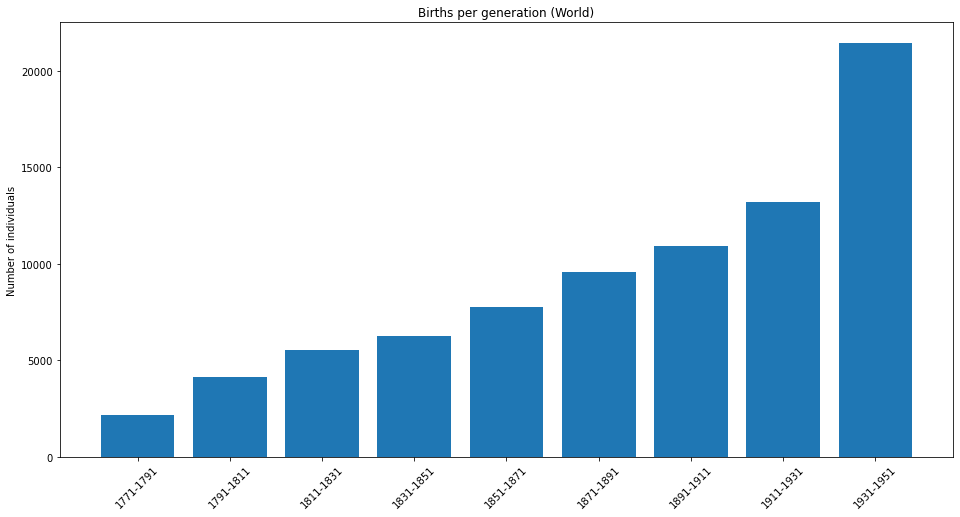

In [63]:
# Plot with number of individuals per generation
objects = [l for l in pt_generation.index]
eff = [l for l in pt_generation['year']]

p1 = plt.bar(objects, eff)

plt.ylabel('Number of individuals')
plt.title('Births per generation (World)')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()

In [64]:
### Generation-Continent Contingency table

X = "generation"  
Y = "continent"

generation_continent = coded_nationalities_generation[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len).fillna(0).astype(int) 
generation_continent



continent,Africa,Asia,Central Am.,Europe,Middle East,North Am.,Oceania,South Am.,uncoded
generation,,,,,,,,,
1771-1791,1,1,12,1052,1,1015,8,108,0
1791-1811,5,2,21,2215,8,1724,21,157,0
1811-1831,13,13,22,2728,3,2493,33,258,2
1831-1851,16,82,31,3249,17,2404,81,377,0
1851-1871,32,352,44,4196,41,2541,115,427,1
1871-1891,57,556,32,5722,121,2429,112,552,1
1891-1911,83,799,56,6284,260,2543,145,780,0
1911-1931,228,1032,105,6478,494,3594,164,1093,0
1931-1951,628,2156,194,10631,764,4953,406,1699,2


In [65]:
# change the number of individuals into a percentage
perc_contin = generation_continent.apply(lambda x: x*100/sum(x), axis=1)

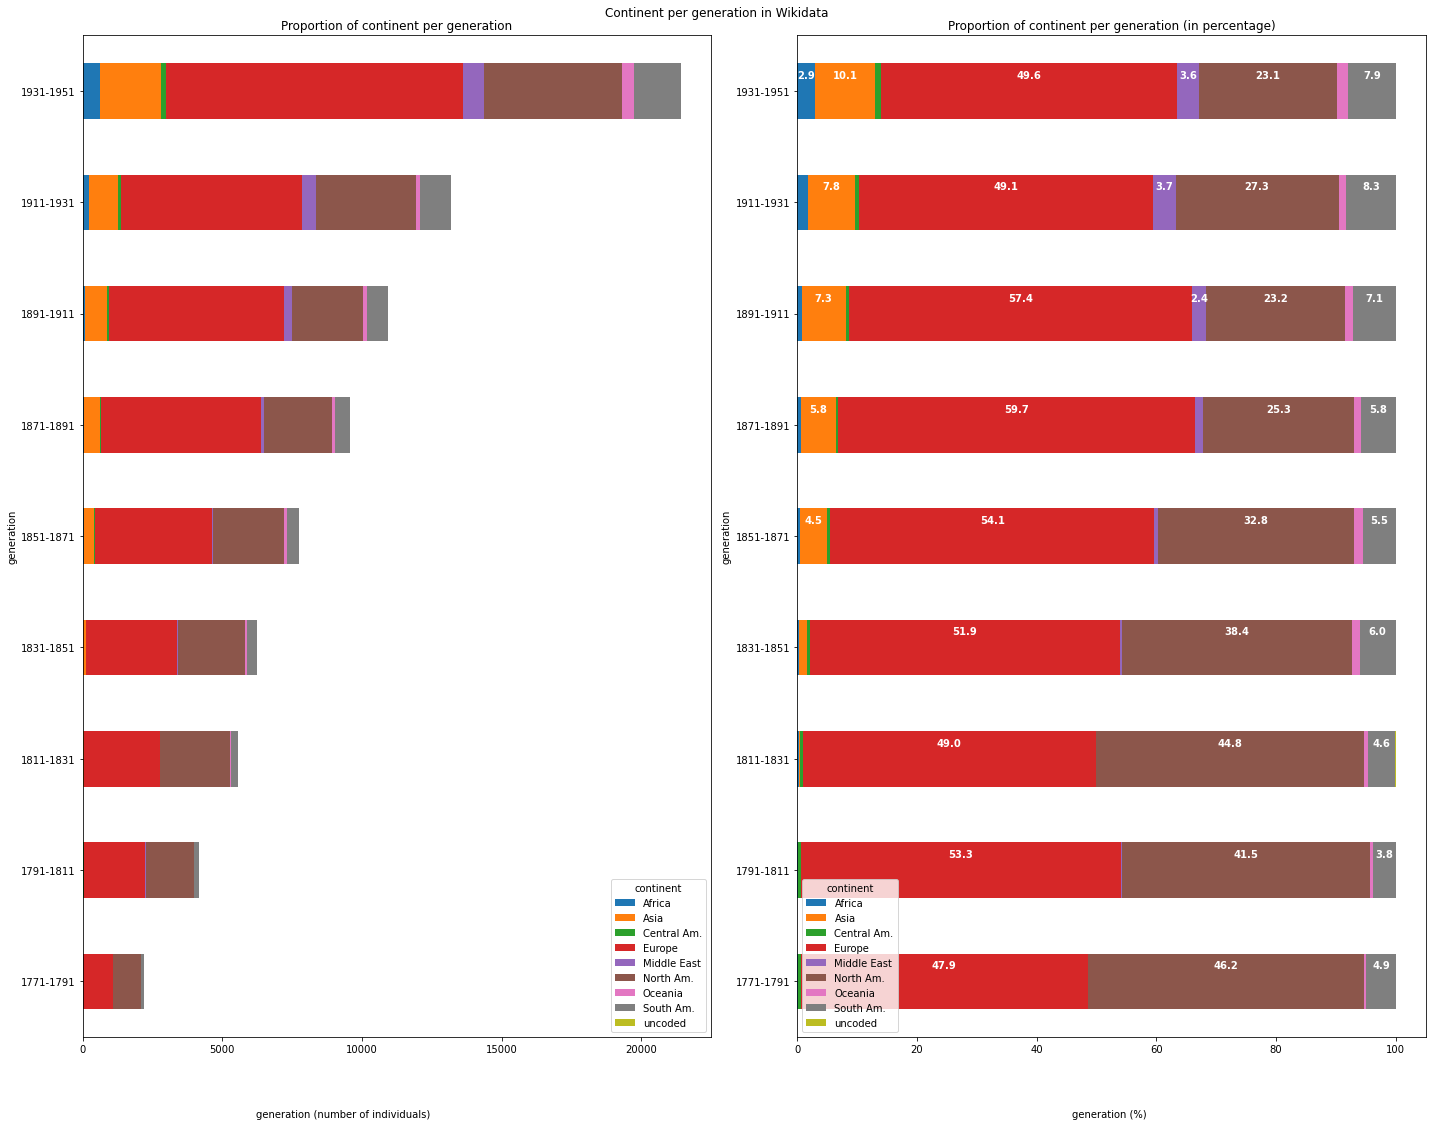

In [66]:
# create subplots side by side:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
fig.suptitle('Continent per generation in Wikidata')
generation_continent.plot( kind='barh', stacked=True, ax=ax1, title="Proportion of continent per generation")
z_cont=perc_contin.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of continent per generation (in percentage)")
plt.tight_layout()

# Set labels and legends

fig.text(0.747, -0.05, 'generation (%)', ha='left', va='bottom')
fig.text(0.180, -0.05, 'generation (number of individuals)', ha='left', va='bottom')

#  Add percentages on the right plot: 

for p in z_cont.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 2:
        z_cont.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

ax1.legend( title= "continent", loc='lower right')
ax2.legend( title= "continent",loc='lower left')

plt.show()

# Focus on Europe

Now, we will focus on Europe. First of all, it is the continent with the most individuals. Then, there is a lot of countries in, so we can realize a new slicing, by European regions. These regions are thought in part with the United Nations geoscheme (https://en.wikipedia.org/wiki/United_Nations_geoscheme) and The World Factbook (https://en.wikipedia.org/wiki/Eastern_Europe)

These regions (with the current countries) are: 
* Britain Isles : 
    - United Kingdom
    - Ireland
* Western Europe: 
    - France
    - Netherlands 
    - Belgium
    - Luxembourg
    - Switzerland
* Scandinavia: 
    - Scandinavian countries
* Central Europe: 
    - Germany
    - Austria
    - Czech Republic
    - Poland
    - Hungary
    - Slovakia
    - Liechtenstein
    - Slovenia
* Southeastern Europe:
    - Balkans
    - Roumania
    - Bulgaria
    - Cyprus
* Southern Europe:
    - Italy
    - Spain
    - Portugal
    - Andorra
    - Malta
* Eastern Europe:
    - Baltic states
    - Russia
    - Ukraine
    - Byelorussia
    - Georgia

In [67]:
nation_coded= pd.read_csv("spreadsheets/nationalities_coded.csv", sep="|")
europe= nation_coded[nation_coded['continent']=='Europe']
print(europe[:30])

                                    nationality   freq   code continent
1                                       Germany  12223  Germa    Europe
2                                         Spain   5396  Spain    Europe
3                                        France   3933  Franc    Europe
4                                United Kingdom   3853  Unite    Europe
6                                        Poland   3016  Polan    Europe
9                              Kingdom of Italy   2397  Kingd    Europe
10                                        Italy   2000  Italy    Europe
11                                 Soviet Union   1938  Sovie    Europe
12                                       Norway   1791  Norwa    Europe
13                                      Belgium   1685  Belgi    Europe
14                   Kingdom of the Netherlands   1665  Kingd    Europe
16                                      Hungary   1453  Hunga    Europe
18  United Kingdom of Great Britain and Ireland   1339  Unite   

In [68]:
europe.to_csv('spreadsheets/europe.csv', sep="|",index=False)

In [81]:
# Encode handmade the European regions (they are not marked in Wikidata)
# The best way to do, it is directly added in Wikidata or the graph database.
europe=pd.read_csv("spreadsheets/europe_count.csv", sep="|")

In [82]:
europe.head()

,nationality,freq,code,continent,region
0,Germany,12223,Germa,Europe,Central Europe
1,Spain,5396,Spain,Europe,Southern Europe
2,France,3933,Franc,Europe,Western Europe
3,United Kingdom,3853,Unite,Europe,British Isles
4,Poland,3016,Polan,Europe,Central Europe


In [83]:
# Add the continent of the individuals
merged_euro= pd.merge(df_result_drop,europe, on='nationality', sort=False)
print(len(merged_euro))
merged_euro=merged_euro[['uri_entity','year', 'occupation','region', 'gender']].drop_duplicates()
merged_euro.head()

64609


,uri_entity,year,occupation,region,gender
0,urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,1912,jurist,Central Europe,female
1,urn:uuid:8b81cd5a-63af-4905-817e-9dcea33ae252,1939,jurist,Central Europe,male
2,urn:uuid:0a98b4ed-2ecf-4a4f-8250-e405279d4f64,1965,jurist,Central Europe,male
3,urn:uuid:f526bf21-41c1-4a78-b1fc-3fea7e317611,1777,jurist,Central Europe,male
4,urn:uuid:54f66a96-ec77-4151-8230-92024eae9807,1886,jurist,Central Europe,male


In [85]:
### Group in series per continent
gb_coded_europe = merged_euro.groupby('region').size()
gb_euro=gb_coded_europe.sort_values(ascending = False)

In [86]:
### Transform the object 'Series' into a DataFrame and add the label of the 'frequency' column
# continent is defined as an index
gb_coded_euro = gb_euro.to_frame()
gb_coded_euro.columns = ['frequency']


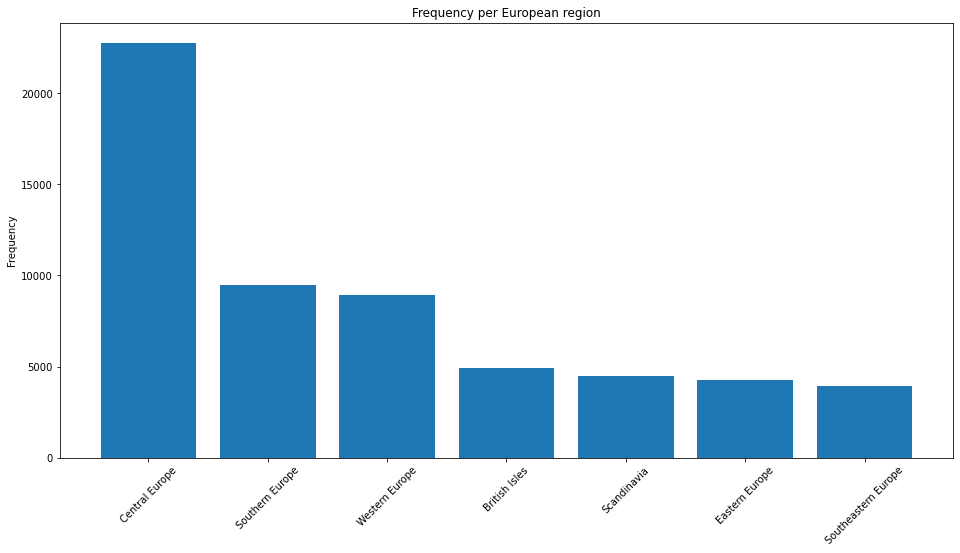

In [87]:
# Distribution per European region

objects = [l for l in gb_coded_euro.index]
eff = [l for l in gb_coded_euro['frequency']]

p1 = plt.bar(objects, eff)

plt.ylabel('Frequency')
plt.title('Frequency per European region')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
#plt.savefig('exported_pictures/nationalities/Frequency_region_europe.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()



In [88]:
# Transform into a list
coded_euro_list = merged_euro[['year', 'region']].values.tolist()
print(len(coded_euro_list))
coded_euro_list[:10]

58714


[[1912, 'Central Europe'],
 [1939, 'Central Europe'],
 [1965, 'Central Europe'],
 [1777, 'Central Europe'],
 [1886, 'Central Europe'],
 [1990, 'Central Europe'],
 [1805, 'Central Europe'],
 [1913, 'Central Europe'],
 [1956, 'Central Europe'],
 [1911, 'Central Europe']]

In [89]:
### Group the list per continent
counter= Counter([t[1] for t in coded_euro_list])
c_coded_euro_list = list(zip(counter.keys(), counter.values()))
sorted_coded_euro_list = sorted(c_coded_euro_list, key=itemgetter(1), reverse=True)
sorted_coded_euro_list

[('Central Europe', 22734),
 ('Southern Europe', 9472),
 ('Western Europe', 8938),
 ('British Isles', 4917),
 ('Scandinavia', 4475),
 ('Eastern Europe', 4265),
 ('Southeastern Europe', 3913)]

In [90]:
values_l = [x[0] for x in sorted_coded_euro_list]

In [91]:
### Transform year into integers
int_coded_euro_list = [[int(l[0]), l[1]] for l in coded_euro_list]

In [92]:
### Create a list with intervals of 10 years.

def create_years_list(period = 10, y_start = 1791, y_end = 1801):

    y_list = []
    y_list.append(y_start)

    while y_start < y_end:
        y_start += period
        y_list.append(y_start)
    return y_list

In [93]:
def interactive_region_periods(region, period = 10, remaining = False):
    
    output_l = []
    work_l = int_coded_euro_list # The year must be integers
    for a in region:
        prov_l = []
        for l in work_l:            
            if a == l[1]:
                output_l.append(l)
            else:
                prov_l.append(l)
        work_l = prov_l

    print('Number of regions chosen: ', len(output_l))
    print('The other (regions unchosen): ',len(work_l))
    print('\n-----')
    
    period = period
    y_list = create_years_list(period = period, y_start = 1770, y_end = 1930)
    
    with plt.style.context("ggplot"):
                
        fig, ax = plt.subplots(figsize=(16,8)) 


        width =  period - (period * 10 / 100)

        bottom_list = []
        i = 0
        while i < len(y_list):
            bottom_list.append(0)
            i += 1

            
        if remaining:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in work_l:
                    if int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label='remaining' )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]
            
            
        for a in region:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in output_l:
                    if l[1] == a and int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label=a )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]
        ax.set_ylabel('Frequency')
        ax.set_title('Frequency per European region (1770-1930)')
        
        plt.xticks(y_list,rotation=45)

        ax.legend()

        p_out = plt.show()


In [94]:
# Frequency per region between 1770 and 1930

k = interactive(interactive_region_periods, region=SelectMultiple(
    options=sorted(values_l),
    value=['Central Europe',
           #'Southern Europe',
           'Western Europe',
           'British Isles',
           #'Scandinavia',
           #'Eastern Europe',
           #'Southeastern Europe'
            ],
    description='Number of regions chosen: ',
    disabled=False
),  period=IntSlider(min=10, max=50, step=1, value=1),
    remaining = Checkbox(
    value=False,
    description='The other (regions unchosen):',
    disabled=False
))

Number of regions chosen:  36589
The other (regions unchosen):  22125

-----


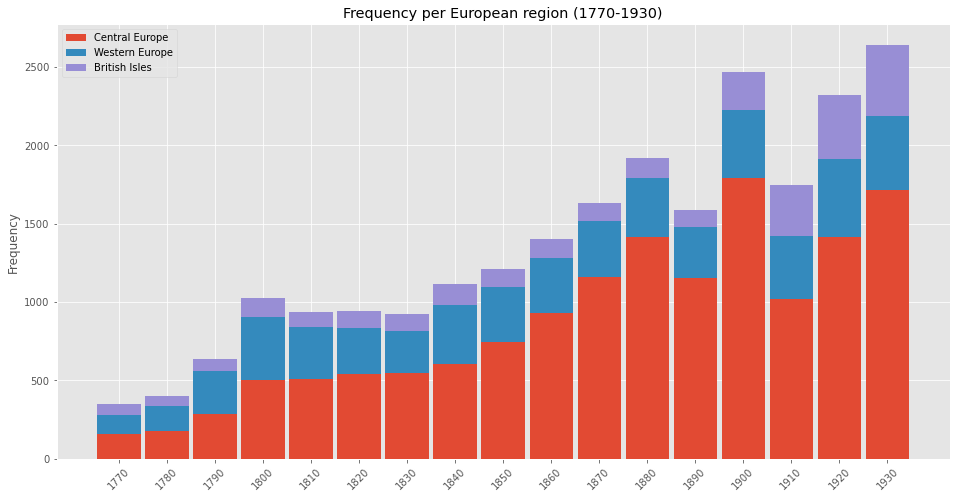

In [95]:
display(k)

#### Comments: 
* The dates used to realize these visualizations are dates of birth. They are dependent on the demographic variations. We choose to slice in 1930 to evaluate the curve before and after the First World War. 
* First, we observe, for **Scandinavia**, between 1770 and 1930, a step after 1860 where the number of individuals increases much. Then, in the **British Isles**, in the same way, this step appends later, after 1900. In **Southern Europe**, the increase seems softer. In **Central Europe**, the curve has characteristics quite similar. But the effects of the First World War are observed (it was already the case for **Southern Europe**, in less proportion). The curve rises strongly in **Southeastern Europe** after 1840 and the number of individuals maintains, more or less, after 1875-1880. Before 1840, the number of individuals is very low compare to after. In **Eastern Europe**, the curve increases all along the XIXth century. But it decreases after 1885 until 1915 and rises again after. Between 1920 and 1930, the number of individuals has returned the same as in 1885. To finish, in **Western Europe**, the curve rises much between 1770 and 1800 and maintains after with some variations.

In [96]:
def interactive_region_periods(region, period = 10, remaining = False):
    
    output_l = []
    work_l = int_coded_euro_list # The year must be integers
    for a in region:
        prov_l = []
        for l in work_l:            
            if a == l[1]:
                output_l.append(l)
            else:
                prov_l.append(l)
        work_l = prov_l

    print('Number of regions chosen: ', len(output_l))
    print('The other (regions unchosen): ',len(work_l))
    print('\n-----')
    
    period = period
    y_list = create_years_list(period = period, y_start = 1930, y_end = 1950)
    
    with plt.style.context("ggplot"):
                
        fig, ax = plt.subplots(figsize=(16,8)) 


        width =  period - (period * 10 / 100)

        bottom_list = []
        i = 0
        while i < len(y_list):
            bottom_list.append(0)
            i += 1

            
        if remaining:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in work_l:
                    if int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label='remaining' )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]
            
            
        for a in region:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in output_l:
                    if l[1] == a and int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label=a )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]
        ax.set_ylabel('Frequency')
        ax.set_title('Frequency per European region (1930-1950)')
        
        plt.xticks(y_list,rotation=45)

        ax.legend()

        p_out = plt.show()


In [97]:
# Frequency per region between 1930 and 1950

k = interactive(interactive_region_periods, region=SelectMultiple(
    options=sorted(values_l),
    value=['Central Europe',
           #'Southern Europe',
           #'Western Europe',
           #'British Isles',
           #'Scandinavia',
           #'Eastern Europe',
           #'Southeastern Europe'
            ],
    description='Number of regions chosen: ',
    disabled=False
),  period=IntSlider(min=1, max=10, step=1, value=1),
    remaining = Checkbox(
    value=False,
    description='The other (regions unchosen):',
    disabled=False
))

Number of regions chosen:  22734
The other (regions unchosen):  35980

-----


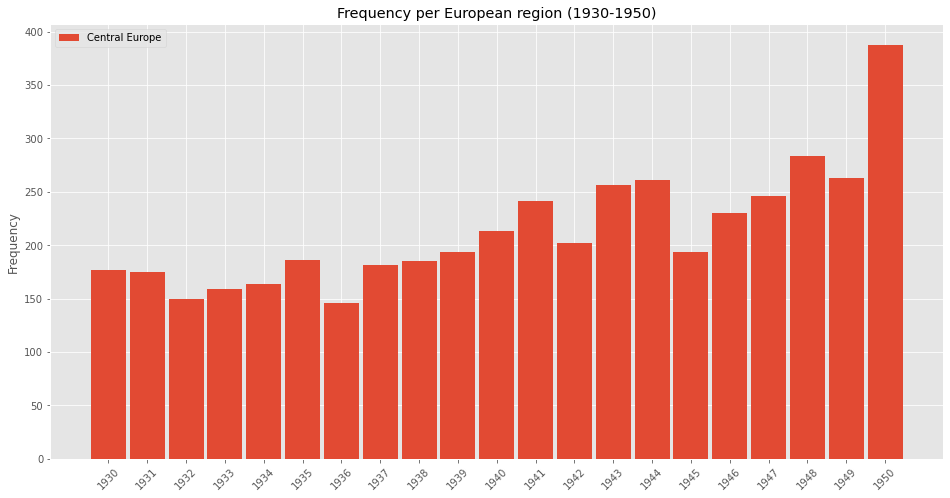

In [98]:
display(k)

## Contingency table between occupations and European regions

In [99]:
# Creation of the occupation-European regions contingency table
X = "occupation"  
Y = "region"

contEuroOcc = merged_euro[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len, margins=True, margins_name='All*').fillna(0).astype(int) 
contEuroOcc = contEuroOcc.sort_values(by="All*")
contEuroOcc= contEuroOcc.loc[:,contEuroOcc.columns!="All*"]


In [100]:
# change the number of individuals into a percentage

perc_contin_EO = contEuroOcc.apply(lambda x: x*100/sum(x), axis=1)
perc_contin_EO

occupation,economist,jurist,jurist/economist
region,,,
Southeastern Europe,30.181446,67.927421,1.891132
Eastern Europe,51.582649,47.596717,0.820633
Scandinavia,21.229050,78.346369,0.424581
British Isles,14.785438,85.051861,0.162701
Western Europe,19.288431,79.794137,0.917431
Southern Europe,17.884291,80.711571,1.404139
Central Europe,24.654702,74.496349,0.848949
All*,23.982355,75.091120,0.926525


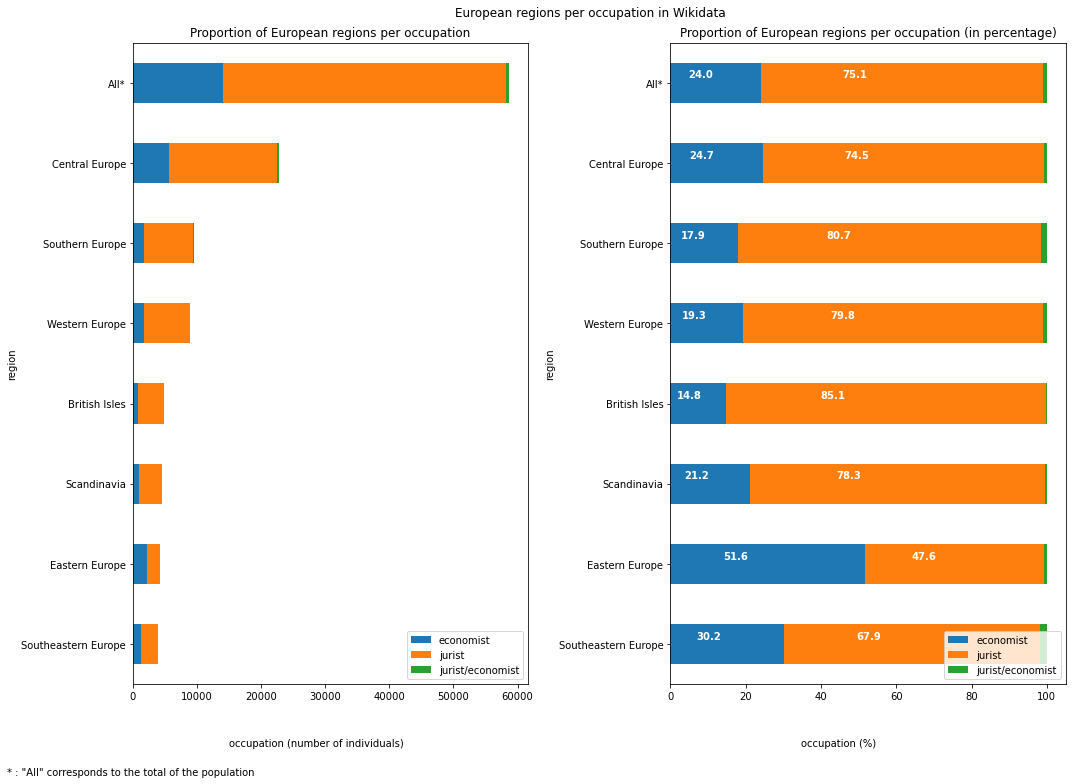

In [101]:
# create subplots side by side:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle(x=0.55,y=0.98, t='European regions per occupation in Wikidata')
contEuroOcc.plot( kind='barh', stacked=True, ax=ax1,title="Proportion of European regions per occupation")
z_EO= perc_contin_EO.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of European regions per occupation (in percentage)")
plt.tight_layout()

# Set labels and legends

fig.text(0.745, -0.05, 'occupation (%)', ha='left', va='bottom')
fig.text(0.215, -0.05, 'occupation (number of individuals)', ha='left', va='bottom')
fig.text(0.01, -0.09, '* : "All" corresponds to the total of the population', ha='left', va='bottom')

#  Add percentages on the right plot: 

for p in z_EO.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 2:
        z_EO.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/3, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12),
                   textcoords = 'offset points')

ax1.legend(loc='lower right')
ax2.legend(loc='lower right')

plt.show()

## Contingency table between genders and European regions

In [102]:
# Creation of the contingency table

X = "gender"  
Y = "region"

contEuroGend = merged_euro[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len, margins=True, margins_name='All*').fillna(0).astype(int) 
contEuroGend = contEuroGend.sort_values(by="All*")
contEuroGend= contEuroGend.loc[:,contEuroGend.columns!="All*"]

In [103]:
perc_contin_EG = contEuroGend.apply(lambda x: x*100/sum(x), axis=1)
perc_contin_EG

gender,female,male,other
region,,,
Southeastern Europe,8.944544,91.055456,0.000000
Eastern Europe,13.434936,86.565064,0.000000
Scandinavia,11.865922,88.134078,0.000000
British Isles,10.189140,89.770185,0.040675
Western Europe,9.308570,90.680242,0.011188
Southern Europe,8.709882,91.279561,0.010557
Central Europe,7.829682,92.170318,0.000000
All*,9.183500,90.809688,0.006813


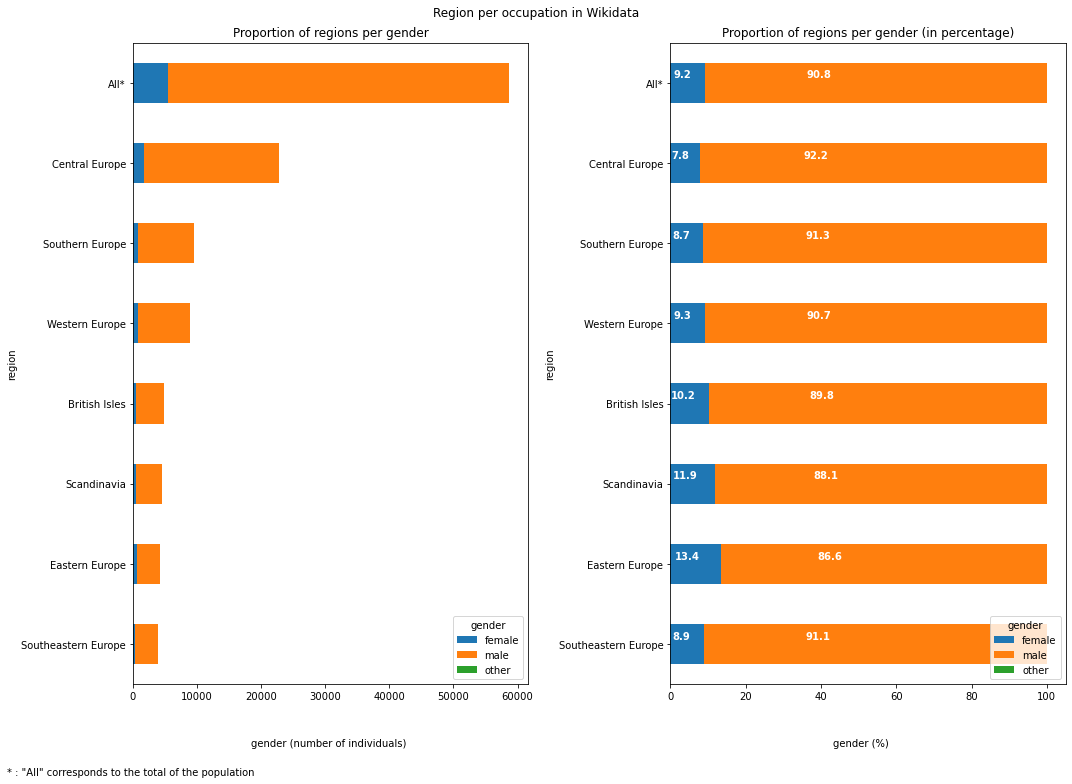

In [104]:
# create subplots side by side:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Region per occupation in Wikidata')
contEuroGend.plot( kind='barh', stacked=True, ax=ax1, title="Proportion of regions per gender")
z_EG=perc_contin_EG.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of regions per gender (in percentage)")
plt.tight_layout()

# Set labels and legends

fig.text(0.775, -0.05, 'gender (%)', ha='left', va='bottom')
fig.text(0.38, -0.05, 'gender (number of individuals)', ha='right', va='bottom')
fig.text(0.01, -0.09, '* : "All" corresponds to the total of the population', ha='left', va='bottom')

#  Add percentages on the right plot: 

for p in z_EG.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width >= 2:
        z_EG.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/3, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12),
                   textcoords = 'offset points')
plt.show()

## Evolution in European regions per generation

In [105]:
d20List = []
period = 20
d_start = 1771
i = 0
d20List.append(d_start)

while i < 11:
    d_start = d_start + period
    d20List.append(d_start)
    i += 1

In [106]:
merged_euro_generation = merged_euro.copy(deep=True)
merged_euro_generation= merged_euro_generation[merged_euro_generation["year"]<=1950]
merged_euro_generation['generation'] = pd.cut(merged_euro['year'], d20List, right=False)

In [107]:
# Change the format of the generations column to make it clearer
merged_euro_generation['generation'] = merged_euro_generation['generation'].apply(lambda row : str(int(row.left))+'-'+str(int(row.right)))

In [108]:
# Count the number of individuals by generation
pt_generation_euro = pd.pivot_table(merged_euro_generation, index=['generation'], values='year', aggfunc=len,fill_value=0)
print(type(pt_generation_euro))
pt_generation_euro

<class 'pandas.core.frame.DataFrame'>


,year
generation,
1771-1791,1068
1791-1811,2253
1811-1831,2784
1831-1851,3327
1851-1871,4371
1871-1891,5958
1891-1911,6501
1911-1931,6728
1931-1951,10916


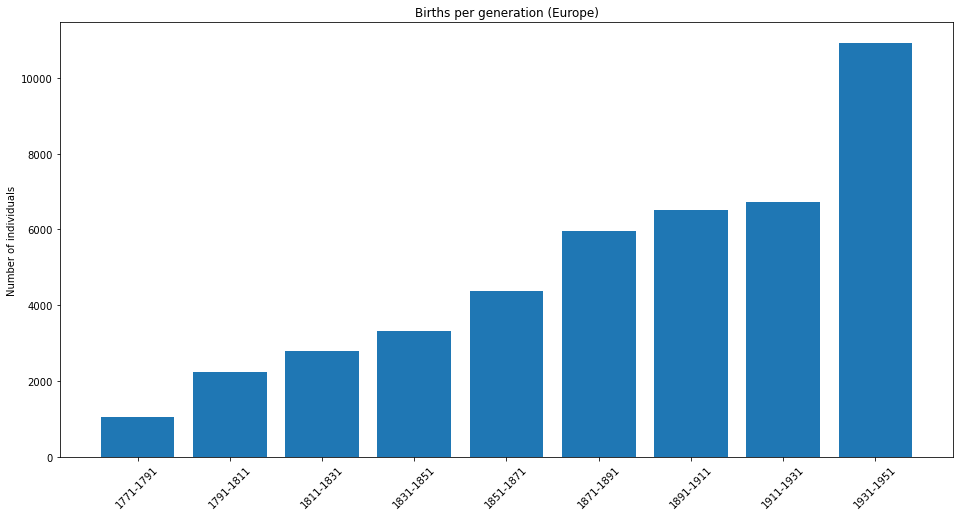

In [109]:
# Barplot of this count 
objects = [l for l in pt_generation_euro.index]
eff = [l for l in pt_generation_euro['year']]

p1 = plt.bar(objects, eff)

plt.ylabel('Number of individuals')
plt.title('Births per generation (Europe)')
plt.gcf().set_size_inches(16, 8)

# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()

In [110]:
### Generation-European region contingency table
X = "generation"  
Y = "region"

generation_europe = merged_euro_generation[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len).fillna(0).astype(int) 
generation_europe



region,British Isles,Central Europe,Eastern Europe,Scandinavia,Southeastern Europe,Southern Europe,Western Europe
generation,,,,,,,
1771-1791,138,355,25,117,12,137,284
1791-1811,194,794,50,144,28,352,691
1811-1831,204,1057,98,200,52,548,625
1831-1851,264,1166,208,213,135,700,641
1851-1871,227,1719,276,369,297,772,711
1871-1891,241,2583,404,442,561,993,734
1891-1911,363,2965,278,507,534,1088,766
1911-1931,744,2468,374,614,576,1035,917
1931-1951,1329,4318,818,776,648,1629,1398


In [111]:
# change the number of individuals into a percentage
perc_contin_euro = generation_europe.apply(lambda x: x*100/sum(x), axis=1)

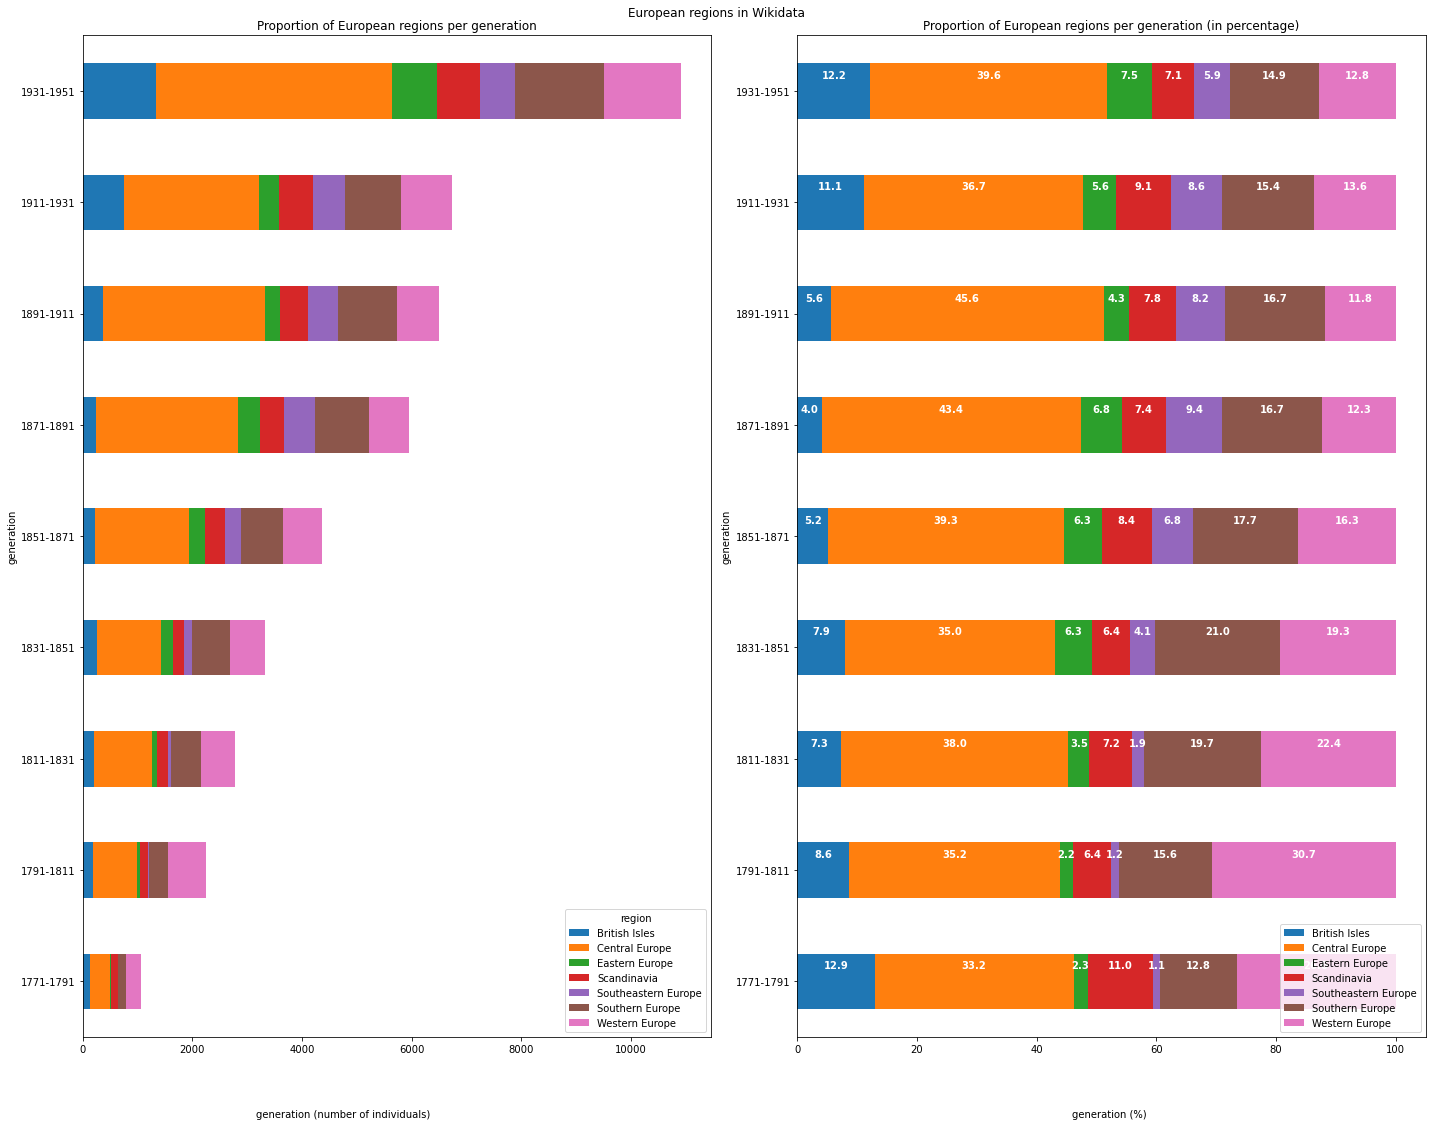

In [114]:
# create subplots side by side:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
fig.suptitle('European regions in Wikidata')
g=generation_europe.plot( kind='barh', stacked=True, ax=ax1, title="Proportion of European regions per generation")
z= perc_contin_euro.plot(kind="barh", stacked=True, ax=ax2, title="Proportion of European regions per generation (in percentage)")
plt.tight_layout()

# Set labels and legends

fig.text(0.747, -0.05, 'generation (%)', ha='left', va='bottom')
fig.text(0.180, -0.05, 'generation (number of individuals)', ha='left', va='bottom')

plt.legend(loc='best')

#  Add percentages on the right plot: 

for p in z.patches:
    left, bottom, width, height = p.get_bbox().bounds
    #if width >= 2:
    z.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()